In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **EDA**

In [ ]:
df = pd.read_csv('Computer_Data.csv')
df.head()

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


**target variable price,
estimate the price of the computer based on attributes of the computer**

In [ ]:
df.drop('Unnamed: 0', inplace = True, axis =1)

In [ ]:
#attributes
df.axes
df.index
df.columns
df.shape
df.size
df.dtypes
df.idxmax

<bound method DataFrame.idxmax of       price  speed    hd  ram  screen   cd multi premium  ads  trend
0      1499     25    80    4      14   no    no     yes   94      1
1      1795     33    85    2      14   no    no     yes   94      1
2      1595     25   170    4      15   no    no     yes   94      1
3      1849     25   170    8      14   no    no      no   94      1
4      3295     33   340   16      14   no    no     yes   94      1
...     ...    ...   ...  ...     ...  ...   ...     ...  ...    ...
6254   1690    100   528    8      15   no    no     yes   39     35
6255   2223     66   850   16      15  yes   yes     yes   39     35
6256   2654    100  1200   24      15  yes    no     yes   39     35
6257   2195    100   850   16      15  yes    no     yes   39     35
6258   2490    100   850   16      17  yes    no     yes   39     35

[6259 rows x 10 columns]>

### finding null values

In [ ]:
df.isna().sum()

price      0
speed      0
hd         0
ram        0
screen     0
cd         0
multi      0
premium    0
ads        0
trend      0
dtype: int64

there are no null values

### Duplicates

In [ ]:
df.duplicated().sum()

76

76 rows having duplicates

In [ ]:
df.drop_duplicates(inplace = True)

### Descriptive stats

In [ ]:
df.describe()

,price,speed,hd,ram,screen,ads,trend
count,6183.000000,6183.000000,6183.000000,6183.000000,6183.000000,6183.000000,6183.000000
mean,2221.837943,52.129549,417.760796,8.305353,14.614265,220.906033,15.944364
std,582.042129,21.190655,259.458342,5.649178,0.907304,74.958628,7.903073
min,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,162.000000,10.000000
50%,2145.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,22.000000
max,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000


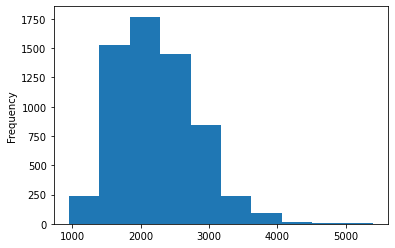

In [ ]:
df['price'].plot.hist()

In [ ]:
df.reset_index(inplace = True)

In [ ]:
df.drop(['cd','multi','premium'], inplace=True, axis = 1)

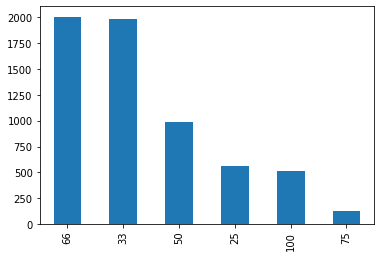

In [ ]:
df['speed'].value_counts().plot.bar()

In [ ]:
df.std()

index     1813.202044
price      582.042129
speed       21.190655
hd         259.458342
ram          5.649178
screen       0.907304
ads         74.958628
trend        7.903073
dtype: float64

In [ ]:
df.skew()

index    -0.001869
price     0.707202
speed     0.651569
hd        1.371223
ram       1.380244
screen    1.621153
ads      -0.544937
trend     0.233402
dtype: float64

In [ ]:
df.drop('index', inplace = True, axis = 1)

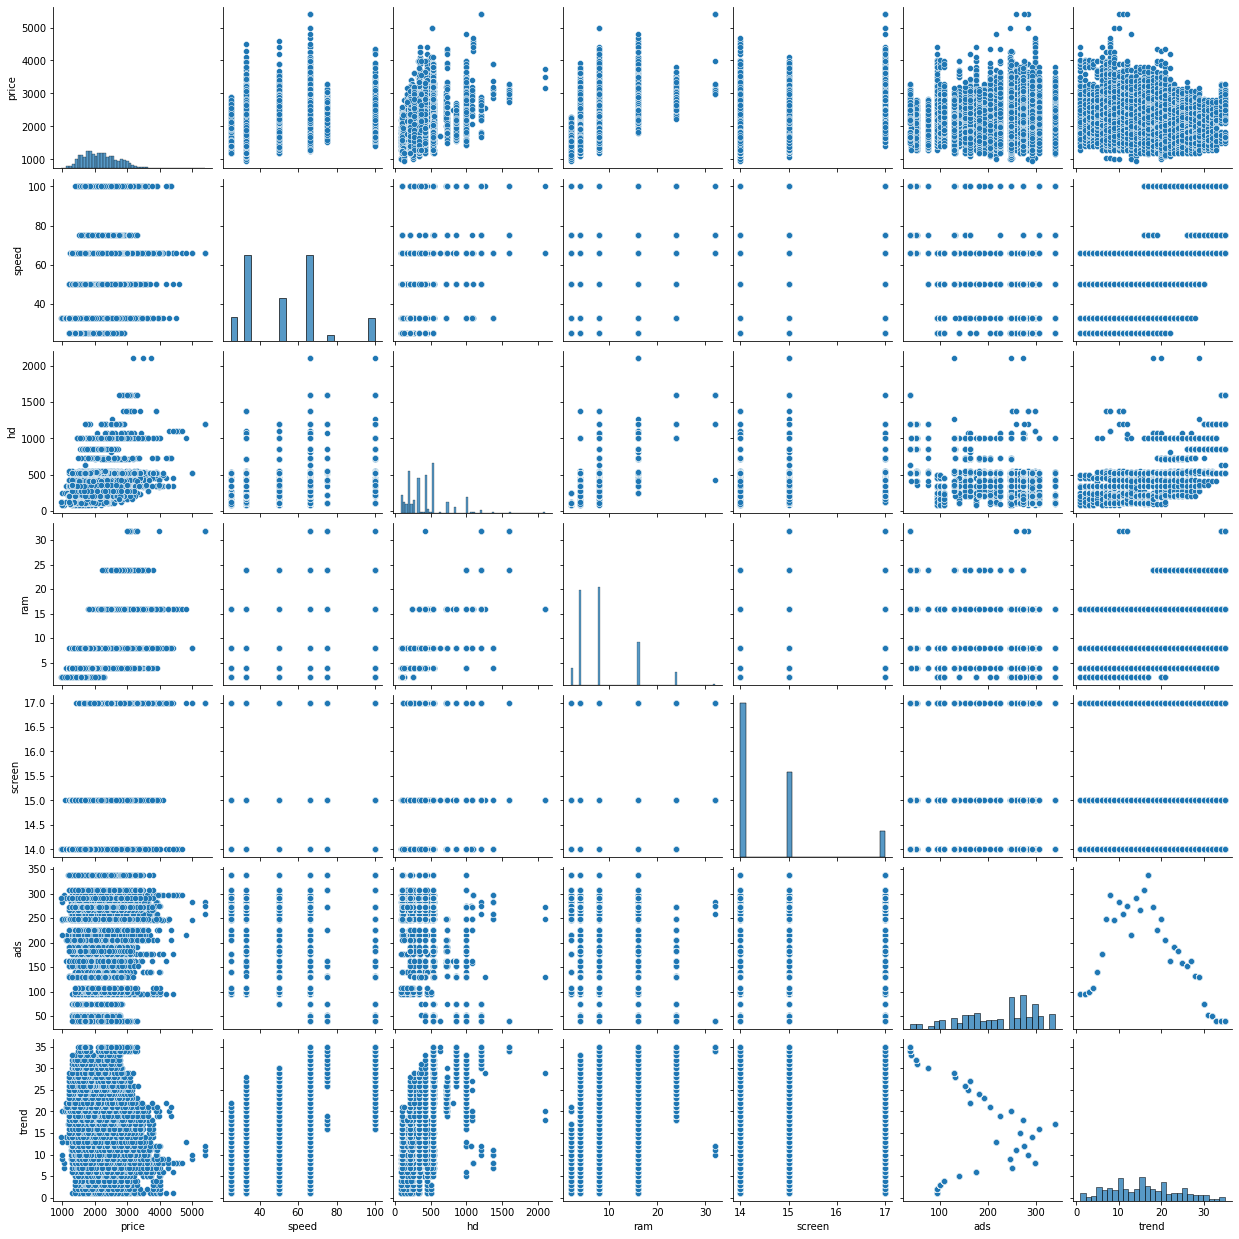

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

,price,speed,hd,ram,screen,ads,trend
price,1.000000,0.298515,0.428845,0.621144,0.295094,0.056434,-0.201662
speed,0.298515,1.000000,0.370356,0.232566,0.187519,-0.214349,0.404830
hd,0.428845,0.370356,1.000000,0.777399,0.232675,-0.323342,0.577599
ram,0.621144,0.232566,0.777399,1.000000,0.208871,-0.181463,0.276938
screen,0.295094,0.187519,0.232675,0.208871,1.000000,-0.092144,0.189549
ads,0.056434,-0.214349,-0.323342,-0.181463,-0.092144,1.000000,-0.320626
trend,-0.201662,0.404830,0.577599,0.276938,0.189549,-0.320626,1.000000


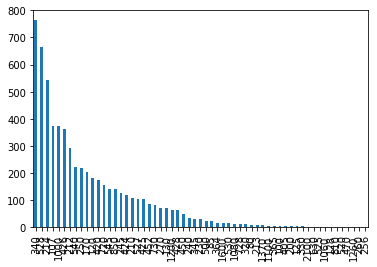

In [ ]:
df['hd'].value_counts().plot.bar()

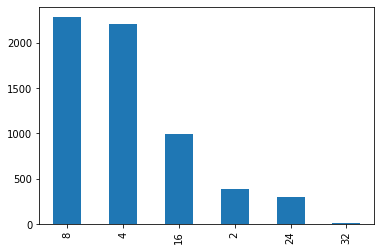

In [ ]:
df['ram'].value_counts().plot.bar()

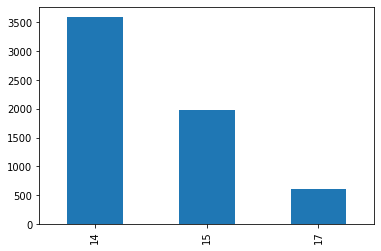

In [ ]:
df['screen'].value_counts().plot.bar()

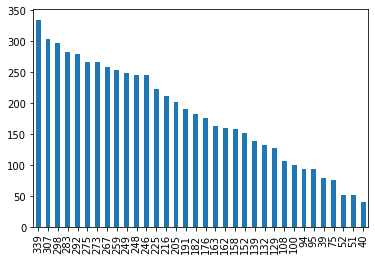

In [ ]:
df['ads'].value_counts().plot.bar()

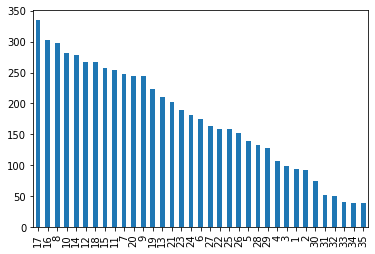

In [ ]:
df['trend'].value_counts().plot.bar()

# **Model**

## **Model1**
without treating outliers

In [ ]:
model1 = smf.ols('price~speed+hd+screen+ads+trend+ram', data = df).fit()

## Model validation technique
detecting collinearity
  correlation matrix
  variance inflation factor
    remedies for collinearity
      subset of columns .. model with high r^2 and low AIC select that feature
p-value - for verifying significant feature
r^2 - accuracy of the model

**there is no collinearity**

### VIF

In [ ]:
df.columns

Index(['price', 'speed', 'hd', 'ram', 'screen', 'ads', 'trend'], dtype='object')

In [ ]:
sp = smf.ols('speed~hd+ram+screen+ads+trend', data = df).fit().rsquared
vif_sp = 1/(1-sp)
vif_sp

1.2552928222945494

In [ ]:
hd = smf.ols('hd~speed+ram+screen+ads+trend', data = df).fit().rsquared
vif_hd = 1/(1-hd)
vif_hd

4.102506623934599

In [ ]:
rm = smf.ols('ram~speed+hd+screen+ads+trend', data = df).fit().rsquared
vif_rm = 1/(1-rm)
vif_rm

2.8753457068331523

In [ ]:
sc = smf.ols('screen~speed+hd+ram+ads+trend', data = df).fit().rsquared
vif_sc = 1/(1-sc)
vif_sc

1.0787628388940944

In [ ]:
ad = smf.ols('ads~speed+hd+ram+screen+trend', data = df).fit().rsquared
vif_ad = 1/(1-ad)
vif_ad

1.1612317254285374

In [ ]:
td = smf.ols('trend~speed+hd+ram+screen+ads', data = df).fit().rsquared
vif_td = 1/(1-td)
vif_td

1.8244744443628695

In [ ]:
model1.pvalues

Intercept     2.294423e-04
speed         0.000000e+00
hd           2.892804e-111
screen       4.540235e-161
ads           1.647074e-62
trend         0.000000e+00
ram          7.341902e-305
dtype: float64

all the variables are less than 0.05 then we can say it is significant

In [ ]:
model1.rsquared, model1.rsquared_adj

(0.7114202548849549, 0.7111398989149597)

accuracy of the model is 71.114% 

# **Residual analysis**

## Test for Normality of errors

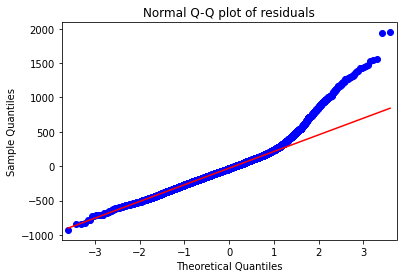

In [ ]:
import statsmodels.api as sm
sm.qqplot(model1.resid, line = 'q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
list(np.where(model1.resid>500))

[array([   5,   19,   24,   27,   29,   37,   41,   60,   70,   74,   80,
          89,  112,  119,  140,  143,  148,  151,  155,  158,  173,  183,
         198,  205,  207,  221,  237,  247,  268,  287,  306,  310,  367,
         390,  410,  414,  458,  465,  486,  487,  489,  500,  506,  534,
         538,  553,  556,  558,  596,  607,  611,  612,  621,  641,  656,
         661,  668,  679,  708,  713,  714,  740,  767,  774,  790,  795,
         835,  837,  847,  859,  881,  895,  938,  945,  964,  975,  987,
        1024, 1032, 1033, 1036, 1041, 1075, 1092, 1095, 1111, 1116, 1120,
        1126, 1138, 1144, 1148, 1163, 1170, 1197, 1200, 1218, 1222, 1239,
        1258, 1285, 1315, 1319, 1328, 1332, 1339, 1356, 1361, 1373, 1400,
        1424, 1432, 1437, 1455, 1458, 1459, 1463, 1464, 1466, 1469, 1484,
        1498, 1508, 1513, 1526, 1535, 1541, 1628, 1632, 1633, 1691, 1694,
        1754, 1764, 1766, 1782, 1791, 1796, 1827, 1846, 1849, 1898, 1921,
        1928, 1933, 1941, 1949, 1953, 

## Residual Vs Predicts
Homoscedasticity

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

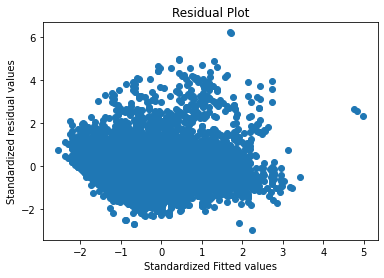

In [ ]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

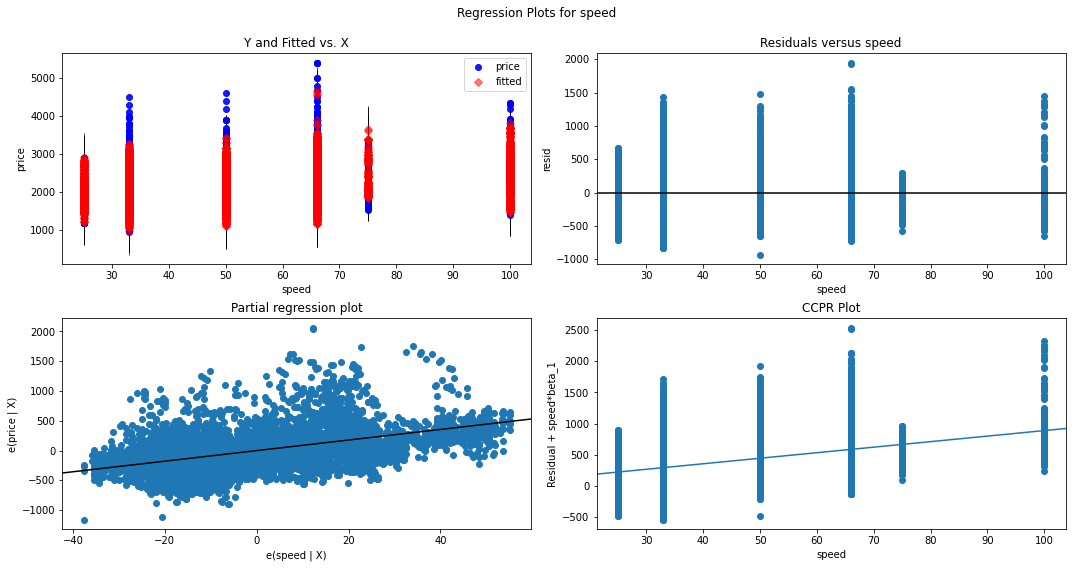

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "speed", fig=fig)
plt.show()

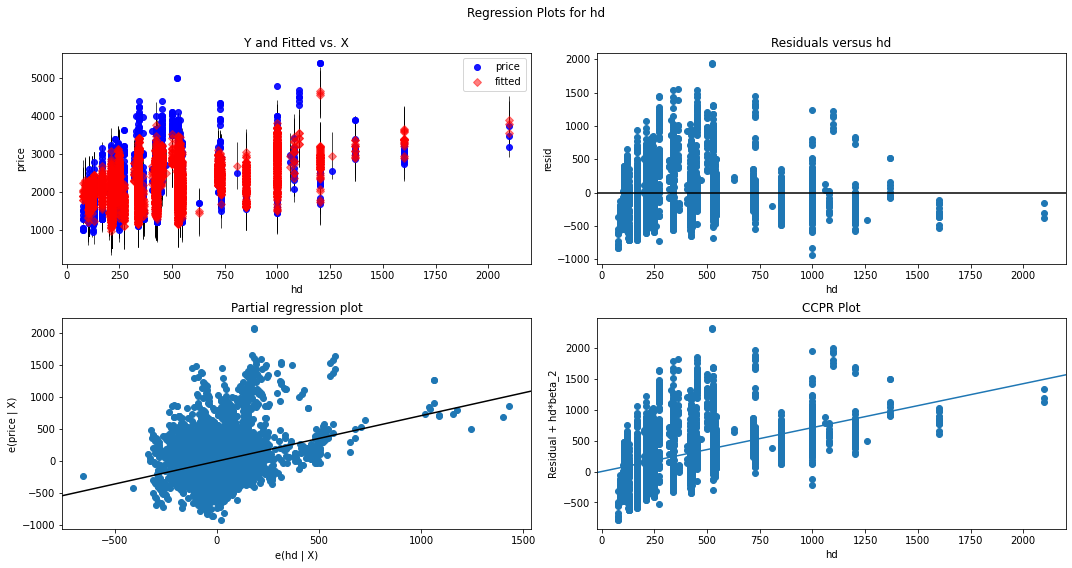

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "hd", fig=fig)
plt.show()

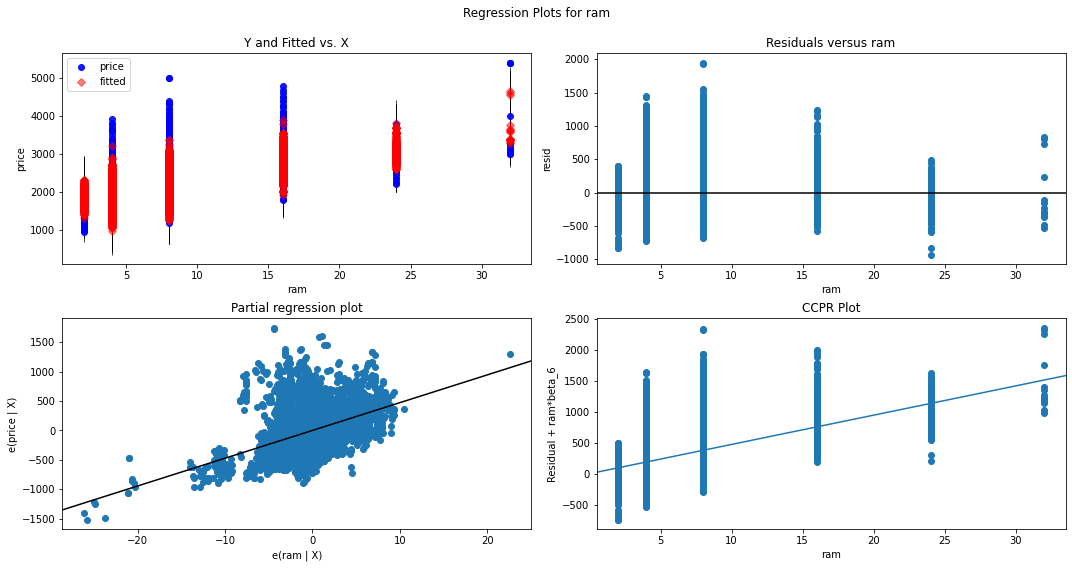

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "ram", fig=fig)
plt.show()

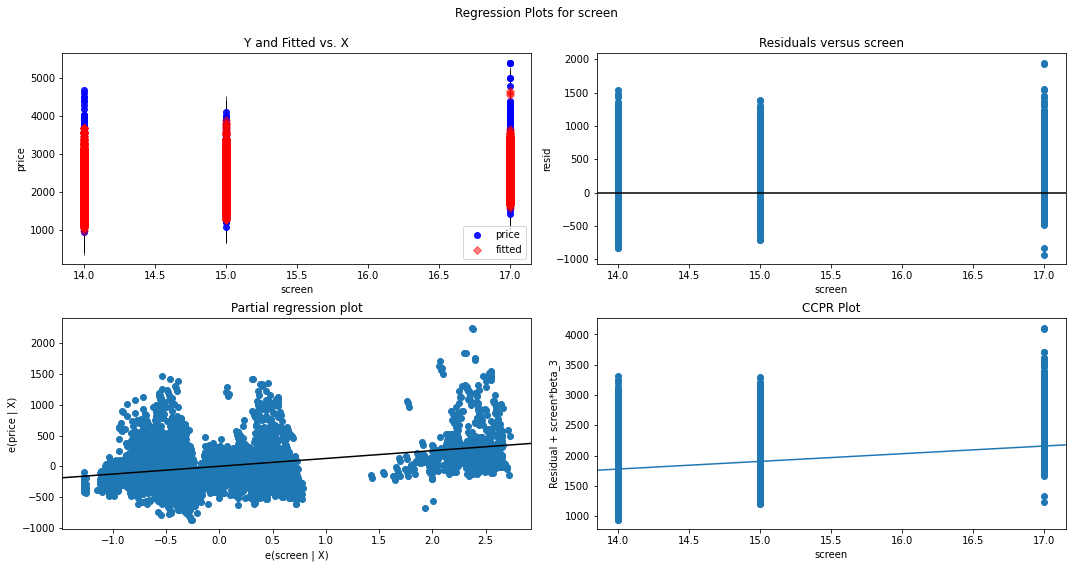

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "screen", fig=fig)
plt.show()

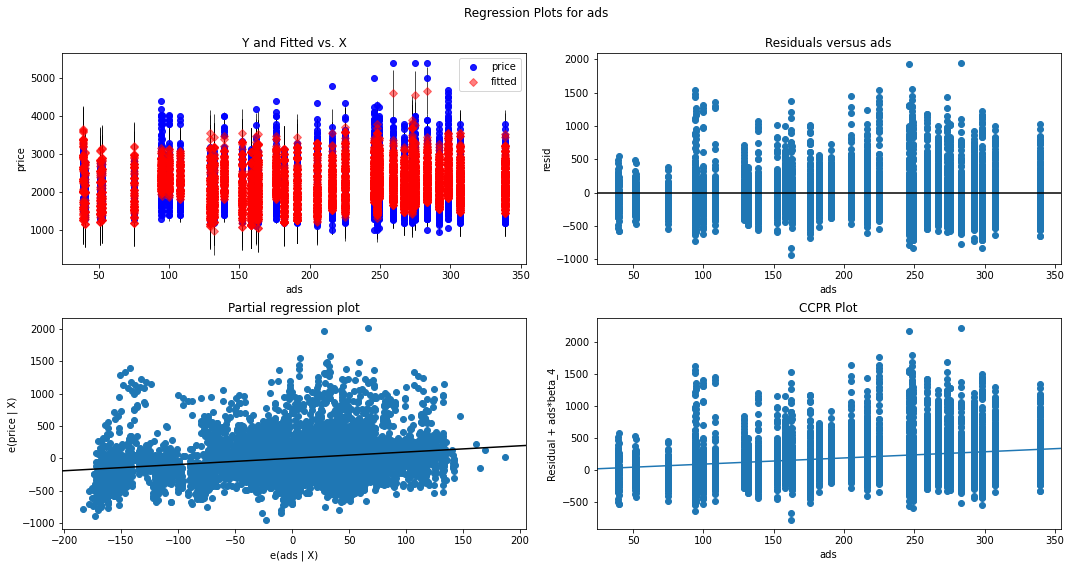

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "ads", fig=fig)
plt.show()

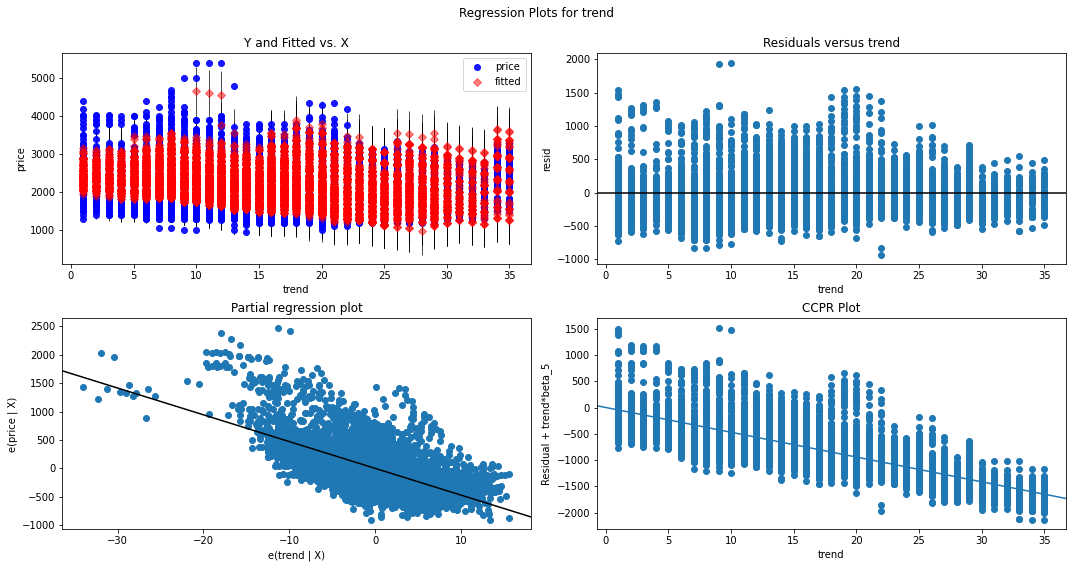

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "trend", fig=fig)
plt.show()

# **Model Deletion diagnostics**

## cook's distance

In [ ]:
model1_influence = model1.get_influence()
(c, _) = model1_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


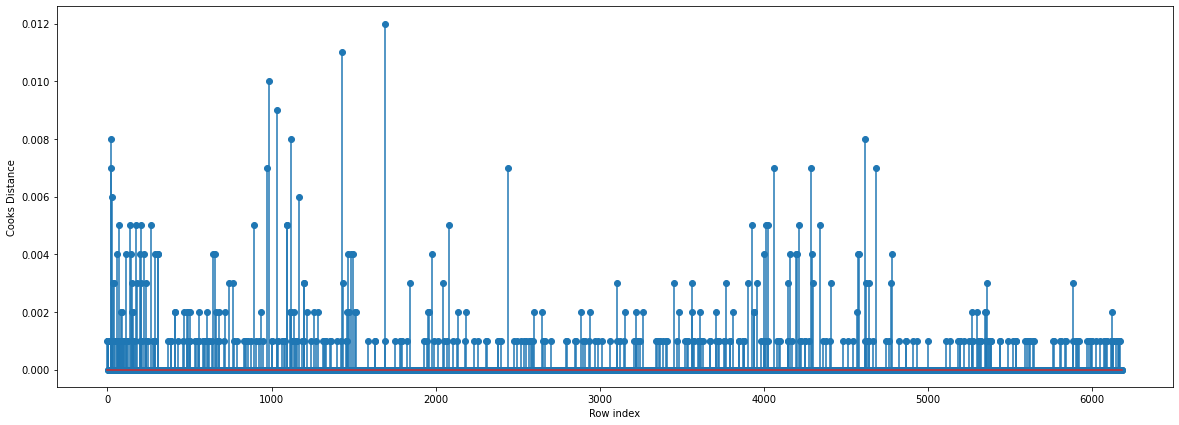

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

## high influence points

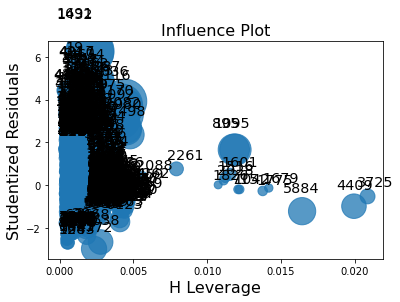

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [ ]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.0038816108685104317

**from above plot all the values above leverage point are influencers**

### Treating leverage points

## Treating oultiers from normality test

In [ ]:
list(np.where(model1.resid>500))

[array([   5,   19,   24,   27,   29,   37,   41,   60,   70,   74,   80,
          89,  112,  119,  140,  143,  148,  151,  155,  158,  173,  183,
         198,  205,  207,  221,  237,  247,  268,  287,  306,  310,  367,
         390,  410,  414,  458,  465,  486,  487,  489,  500,  506,  534,
         538,  553,  556,  558,  596,  607,  611,  612,  621,  641,  656,
         661,  668,  679,  708,  713,  714,  740,  767,  774,  790,  795,
         835,  837,  847,  859,  881,  895,  938,  945,  964,  975,  987,
        1024, 1032, 1033, 1036, 1041, 1075, 1092, 1095, 1111, 1116, 1120,
        1126, 1138, 1144, 1148, 1163, 1170, 1197, 1200, 1218, 1222, 1239,
        1258, 1285, 1315, 1319, 1328, 1332, 1339, 1356, 1361, 1373, 1400,
        1424, 1432, 1437, 1455, 1458, 1459, 1463, 1464, 1466, 1469, 1484,
        1498, 1508, 1513, 1526, 1535, 1541, 1628, 1632, 1633, 1691, 1694,
        1754, 1764, 1766, 1782, 1791, 1796, 1827, 1846, 1849, 1898, 1921,
        1928, 1933, 1941, 1949, 1953, 

In [ ]:
new = df[:]

In [ ]:
index = [   5,   19,   24,   27,   29,   37,   41,   60,   70,   74,   80,
          89,  112,  119,  140,  143,  148,  151,  155,  158,  173,  183,
         198,  205,  207,  221,  237,  247,  268,  287,  306,  310,  367,
         390,  410,  414,  458,  465,  486,  487,  489,  500,  506,  534,
         538,  553,  556,  558,  596,  607,  611,  612,  621,  641,  656,
         661,  668,  679,  708,  713,  714,  740,  767,  774,  790,  795,
         835,  837,  847,  859,  881,  895,  938,  945,  964,  975,  987,
        1024, 1032, 1033, 1036, 1041, 1075, 1092, 1095, 1111, 1116, 1120,
        1126, 1138, 1144, 1148, 1163, 1170, 1197, 1200, 1218, 1222, 1239,
        1258, 1285, 1315, 1319, 1328, 1332, 1339, 1356, 1361, 1373, 1400,
        1424, 1432, 1437, 1455, 1458, 1459, 1463, 1464, 1466, 1469, 1484,
        1498, 1508, 1513, 1526, 1535, 1541, 1628, 1632, 1633, 1691, 1694,
        1754, 1764, 1766, 1782, 1791, 1796, 1827, 1846, 1849, 1898, 1921,
        1928, 1933, 1941, 1949, 1953, 1955, 1962, 1980, 1988, 1989, 1995,
        1997, 2012, 2031, 2047, 2051, 2057, 2060, 2070, 2076, 2079, 2082,
        2089, 2105, 2128, 2134, 2169, 2179, 2187, 2215, 2234, 2237, 2308,
        2314, 2316, 2340, 2346, 2356, 2359, 2367, 2379, 2380, 2385, 2391,
        2417, 2435, 2436, 2437, 2438, 2443, 2462, 2466, 2475, 2482, 2494,
        2496, 2507, 2508, 2520, 2523, 2540, 2552, 2571, 2579, 2590, 2592,
        2596, 2597, 2617, 2623, 2650, 2658, 2719, 2732, 2758, 2783, 2792,
        2799, 2803, 2834, 2840, 2847, 2849, 2858, 2883, 2898, 2907, 2921,
        2928, 2936, 2939, 2951, 2952, 2968, 2974, 2977, 2979, 2989, 2992,
        3013, 3025, 3046, 3055, 3059, 3063, 3100, 3107, 3126, 3144, 3147,
        3154, 3207, 3210, 3211, 3219, 3222, 3234, 3235, 3258, 3261, 3286,
        3340, 3347, 3363, 3387, 3390, 3394, 3451, 3484, 3490, 3521, 3530,
        3560, 3562, 3569, 3577, 3588, 3606, 3610, 3631, 3645, 3663, 3672,
        3710, 3728, 3733, 3757, 3763, 3770, 3788, 3810, 3838, 3848, 3850,
        3861, 3874, 3877, 3880, 3902, 3927, 3937, 3940, 3942, 3961, 3994,
        4001, 4003, 4006, 4010, 4025, 4028, 4042, 4054, 4062, 4079, 4097,
        4144, 4145, 4148, 4162, 4169, 4194, 4203, 4217, 4220, 4225, 4226,
        4250, 4252, 4277, 4286, 4295, 4297, 4341, 4347, 4359, 4375, 4377,
        4400, 4449, 4457, 4483, 4491, 4500, 4513, 4524, 4554, 4566, 4575,
        4578, 4593, 4612, 4614, 4619, 4623, 4629, 4642, 4666, 4678, 4684,
        4728, 4743, 4765, 4779, 4825, 4865, 4879, 4906, 4935, 4943, 4994,
        5000, 5070, 5185, 5194, 5196, 5222, 5249, 5270, 5271, 5298, 5303,
        5304, 5311, 5315, 5348, 5354, 5355, 5359, 5371, 5376, 5382, 5440,
        5502, 5537, 5592, 5764, 5766, 5810, 5834, 5841, 5886, 6090]
new.iloc[index,:]

,price,speed,hd,ram,screen,ads,trend
5,3695,66,340,16,14,94,1
19,4395,66,452,8,14,94,1
24,4195,50,452,8,14,94,1
27,3995,33,452,8,14,94,1
29,3244,66,245,8,14,94,1
...,...,...,...,...,...,...,...
5810,1773,50,270,4,14,129,29
5834,2090,50,364,8,14,129,29
5841,2378,100,364,8,14,129,29
5886,1891,50,364,8,14,129,29


In [ ]:
new.drop(index, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
new.shape

(5777, 7)

In [ ]:
new.reset_index(inplace = True)

In [ ]:
new.drop('index', inplace = True, axis = 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# **Model 2**

In [ ]:
model2 = smf.ols('price~speed+hd+screen+ads+trend+ram', data = new).fit()

In [ ]:
model2.rsquared, model2.rsquared_adj

(0.8156213083919691, 0.8154295801164668)

**if you want to increase the accuracy you can increase by running above methods again**

# **Test Data**

In [ ]:
new.head()

,price,speed,hd,ram,screen,ads,trend
0,1499,25,80,4,14,94,1
1,1795,33,85,2,14,94,1
2,1595,25,170,4,15,94,1
3,1849,25,170,8,14,94,1
4,3295,33,340,16,14,94,1


In [ ]:
X = new.iloc[:, 1:].values
y = new.iloc[:, 0].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 42)

# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
print('Coefficients: \n', regressor.coef_)

# The mean squared error
print("Mean squared error: %.2f" % np.mean((regressor.predict(X_test) - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regressor.score(X_test, y_test))

Coefficients: 
 [  7.8356444    0.45423479  56.83027453  94.58646964   0.84410156
 -40.09431673]
Mean squared error: 48158.57
Variance score: 0.82
